C:\Users\usuario\AppData\Local\Temp\ipykernel_18056\2429356019.py:11: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  defunciones_clean = pd.read_csv('../defunciones_clean.csv')



=== Evaluación con división 70/30 ===

--- RF Base - 70/30 ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\Users\usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


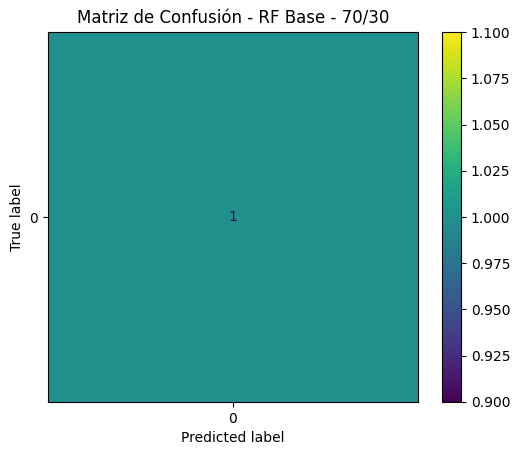


--- RF max_depth=5 - 70/30 ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\Users\usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


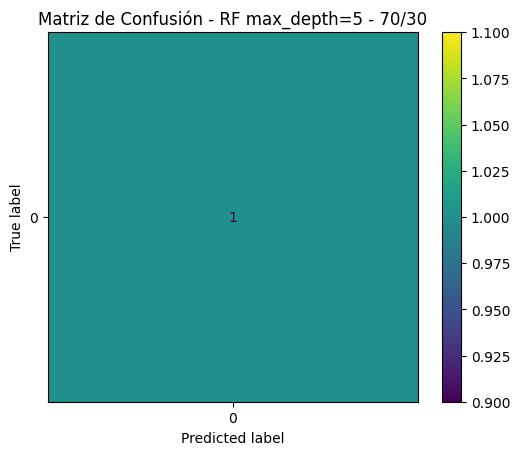


--- RF n_estimators=200 - 70/30 ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\Users\usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


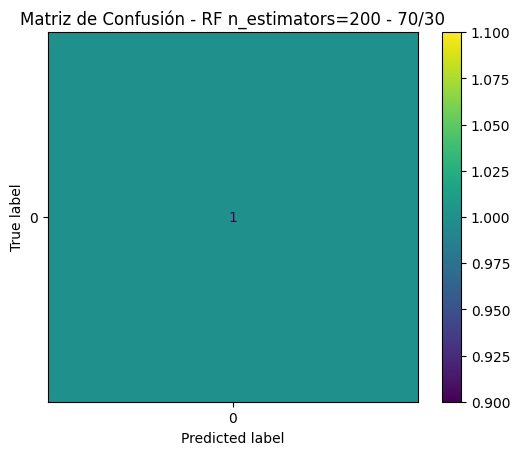


=== Evaluación con división 80/20 ===

--- RF Base - 80/20 ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\Users\usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


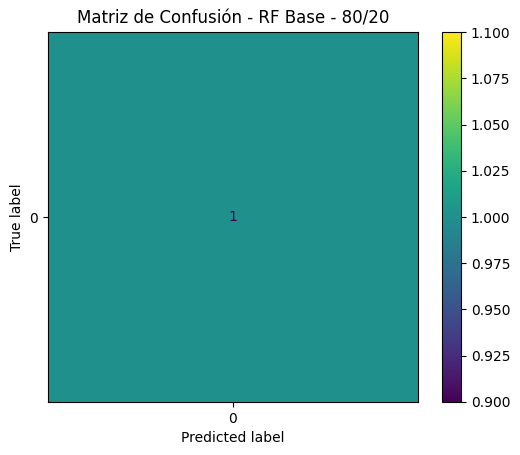


--- RF max_depth=5 - 80/20 ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\Users\usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


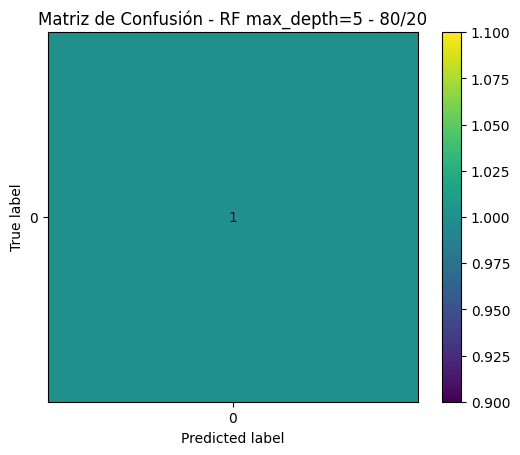


--- RF n_estimators=200 - 80/20 ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\Users\usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


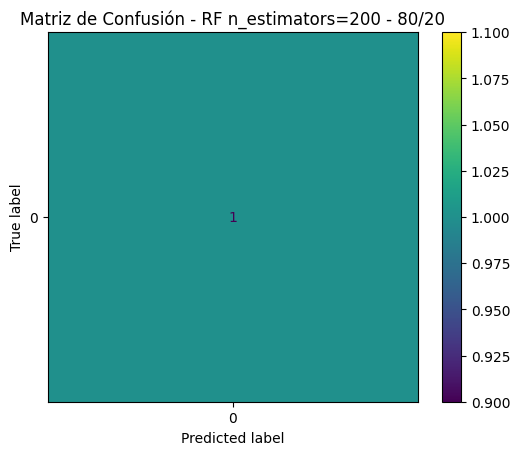


=== Evaluación con división 85/15 ===

--- RF Base - 85/15 ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\Users\usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


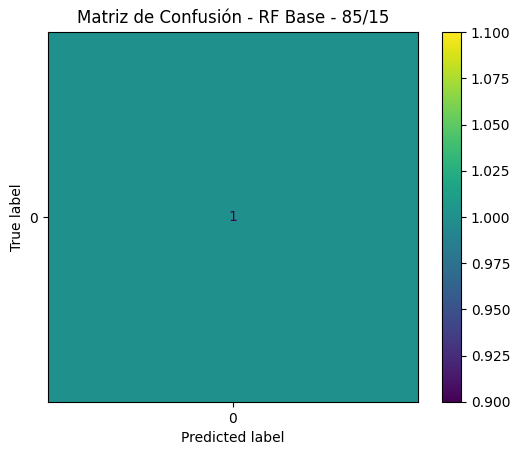


--- RF max_depth=5 - 85/15 ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\Users\usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


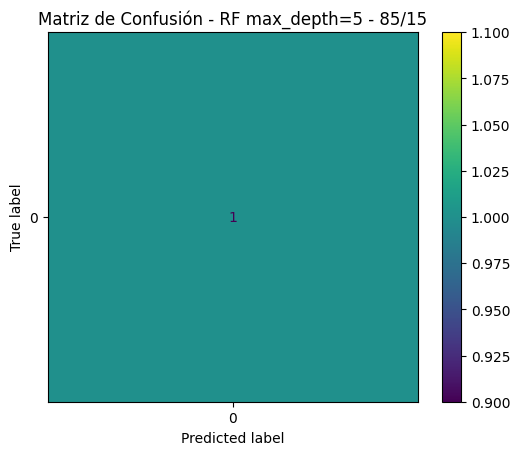


--- RF n_estimators=200 - 85/15 ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



C:\Users\usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


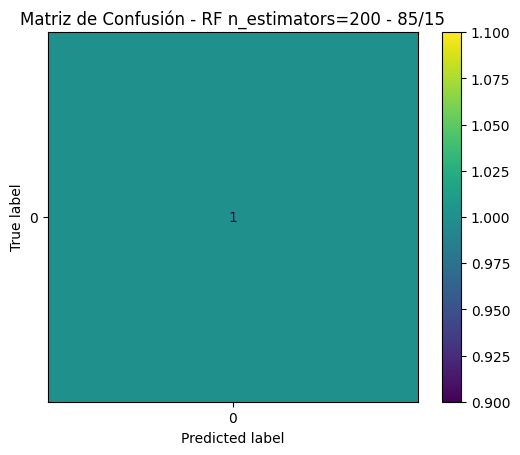

In [2]:
# Clasificación de enfermedad con Random Forest (3 modelos con distintos hiperparámetros y 3 particiones)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Cargar los archivos
defunciones_clean = pd.read_csv('../defunciones_clean.csv')
cie = pd.read_csv('../CIE.csv')

# Filtrar las enfermedades deseadas
enfermedades_buscadas = ['Infarto del miocardio', 'Neumonía no especificada', 'Fallecida, sin mención de complicación']
cie_filtrado = cie[cie['descripcion'].str.contains('|'.join(enfermedades_buscadas), case=False, na=False)]
codigos_enfermedades = cie_filtrado['codigo'].tolist()

defunciones_clean_filtrado = defunciones_clean[defunciones_clean['causa'].isin(codigos_enfermedades)]
defunciones_clean_filtrado = defunciones_clean_filtrado.dropna(subset=['edad', 'sexo', 'año_registrado', 'causa'])

label_encoder = LabelEncoder()
defunciones_clean_filtrado['sexo'] = label_encoder.fit_transform(defunciones_clean_filtrado['sexo'])
defunciones_clean_filtrado['causa'] = label_encoder.fit_transform(defunciones_clean_filtrado['causa'])

X = defunciones_clean_filtrado[['sexo', 'edad', 'año_registrado']]
y = defunciones_clean_filtrado['causa']

# Función para entrenar y evaluar un modelo

def entrenar_y_evaluar(modelo, X_train, X_test, y_train, y_test, titulo):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    print(f"\n--- {titulo} ---")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"Matriz de Confusión - {titulo}")
    plt.show()

# Configuraciones de modelos
modelos = {
    "RF Base": RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42),
    "RF max_depth=5": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),
    "RF n_estimators=200": RandomForestClassifier(n_estimators=200, random_state=42)
}

# Ejecutar modelos en distintas divisiones
for split, test_size in {"70/30": 0.30, "80/20": 0.20, "85/15": 0.15}.items():
    print(f"\n=== Evaluación con división {split} ===")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    for nombre, modelo in modelos.items():
        titulo = f"{nombre} - {split}"
        entrenar_y_evaluar(modelo, X_train, X_test, y_train, y_test, titulo)
